In [1]:
import pandas as pd

# ✅ 데이터 로드
df = pd.read_csv("marketing_advanced.csv", encoding="cp949")

# ✅ 데이터 기본 구조 확인
print("✅ 데이터 크기:", df.shape)


✅ 데이터 크기: (104899, 25)


In [11]:
print("\n✅ 컬럼 정보:")
print(df.info())



✅ 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 non-null  object 
 11  payment_installments           104899 non-null  int64  
 12  seller_id           

In [12]:
# ✅ 상위 5개 샘플 확인
display(df.head())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,...,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
0,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,delivered,2024-10-10 16:29,2024-10-10 19:21,2024-10-16 20:48,2024-10-21,56,남성,핀란드,...,건강식품,62.17,-5.0,15.0,5,11845.97,5,y,50대,d2e1b02d25294e6f
1,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,2024-10-07 17:47,2024-10-07 19:14,2024-10-10 18:02,2024-10-15,61,여성,한국,...,건강식품,57.90,-5.0,434.0,1,25981.89,4,y,50대,d2e1b02d25294e6f
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,2023-08-10 16:35,2023-08-10 19:29,2023-09-05 14:38,2023-09-07,51,남성,필리핀,...,건강식품,60.34,-2.0,0.0,0,26478.17,2,n,50대,d2e1b02d25294e6f
3,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,delivered,2024-03-12 15:03,2024-03-12 17:00,2024-04-01 21:23,2024-04-13,34,여성,덴마크,...,음향가전,128.17,-12.0,20.0,10,208064.64,4,y,30대,f9614bb192ee4050
4,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,delivered,2024-04-14 13:49,2024-04-14 15:41,2024-04-27 23:08,2024-05-05,42,남성,벨기에,...,주방가전,110.15,-8.0,21.0,5,185186.95,2,y,40대,76a306b4cd254f91


In [13]:
# ✅ 결측치 개수 & 비율 확인
missing_count = df.isnull().sum()
missing_ratio = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Ratio (%)': missing_ratio})
print("\n✅ 결측치 비율(%)")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Ratio (%)', ascending=False))



✅ 결측치 비율(%)
                           Missing Count  Missing Ratio (%)
order_delivered_timestamp           2276           2.169706
delivery_delay_days                 2276           2.169706
approval_delay_minutes                14           0.013346


In [14]:
# ✅ 각 컬럼별 고유값 개수 확인 → 범주형/연속형 파악
print("\n✅ 컬럼별 고유값 개수:")
print(df.nunique())



✅ 컬럼별 고유값 개수:
order_id                         98665
customer_id                      95419
order_status                         7
order_purchase_timestamp         94727
order_approved_at                95182
order_delivered_timestamp        75561
order_estimated_delivery_date      448
age                                 48
gender                               2
country                             28
payment_type                         4
payment_installments                24
seller_id                         3095
shipping_charges                   238
category1                            6
category2                           37
price                            10713
delivery_delay_days                198
approval_delay_minutes            5589
weight_kg                            5
volume_cm3                       94756
review_score                         5
marketing_info_agree                 2
agegroup                             5
product_id                          37
dtype: int


✅ 기본 통계량(수치형 변수):
                age  payment_installments  shipping_charges          price  \
count  104899.00000         104899.000000     104899.000000  104899.000000   
mean       40.49357              2.961306         19.319317      68.254875   
std        13.88267              2.749901         15.770373      28.545219   
min        17.00000              0.000000          0.000000      27.240000   
25%        28.00000              1.000000         12.000000      44.050000   
50%        41.00000              2.000000         16.000000      60.050000   
75%        53.00000              4.000000         20.000000      83.270000   
max        64.00000             24.000000        409.000000     146.170000   

       delivery_delay_days  approval_delay_minutes      weight_kg  \
count        102623.000000           104885.000000  104899.000000   
mean            -11.993442              614.228774       4.392311   
std              10.204775             1287.408988       5.168172   
mi

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

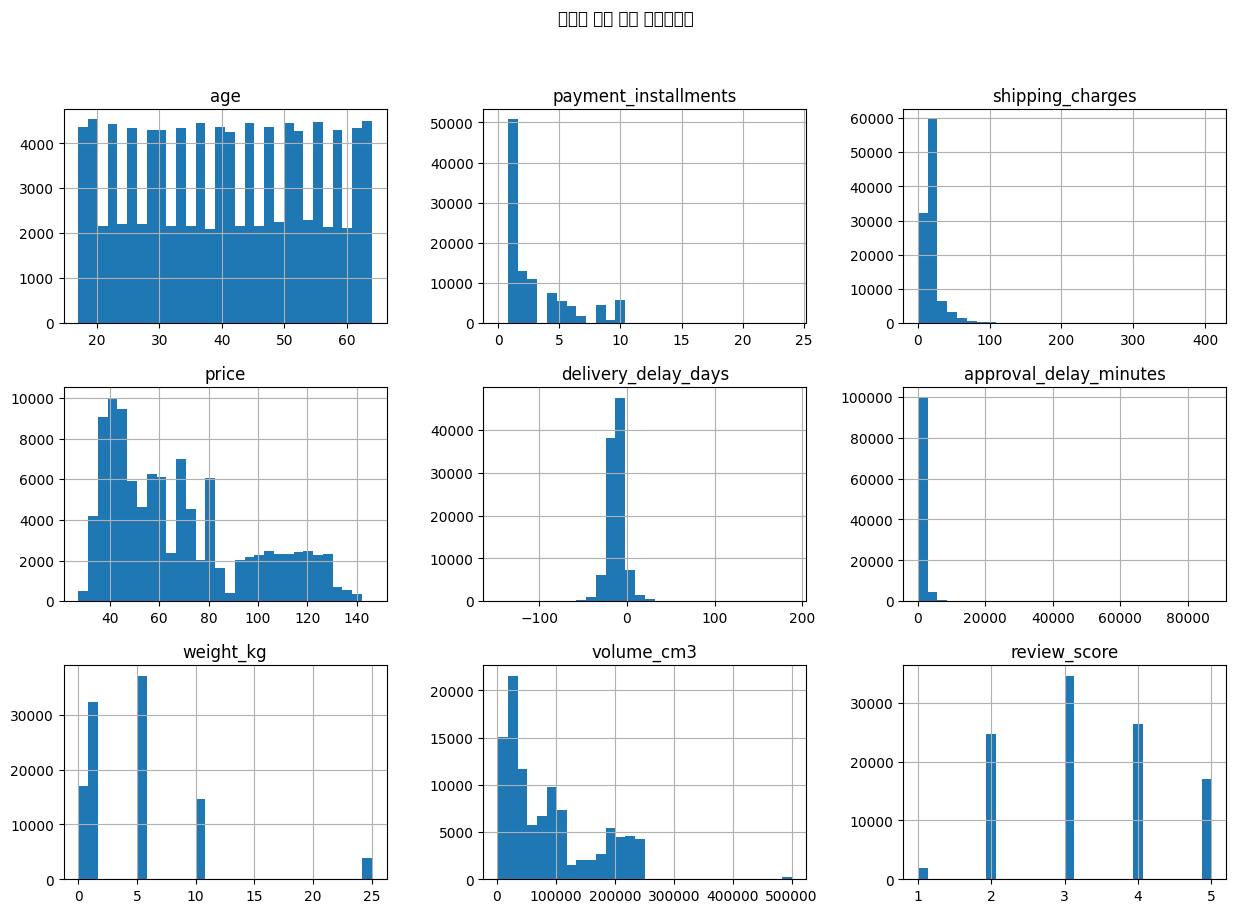

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45

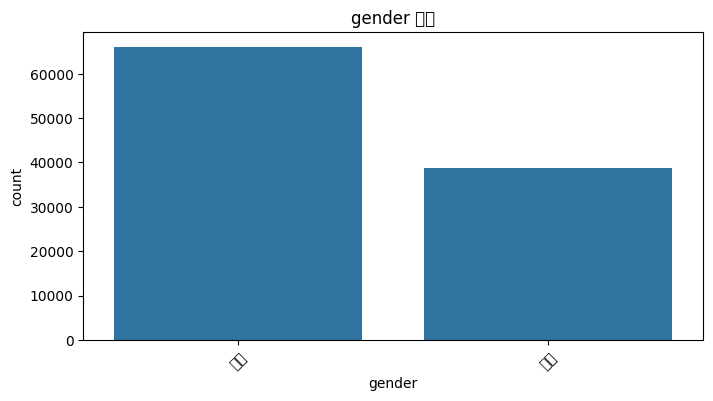

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 546

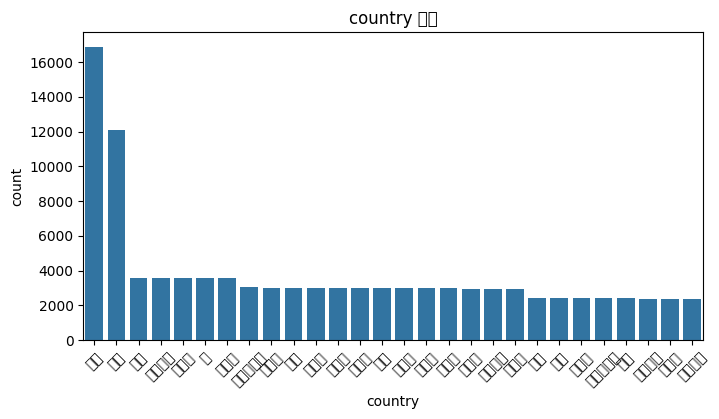

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


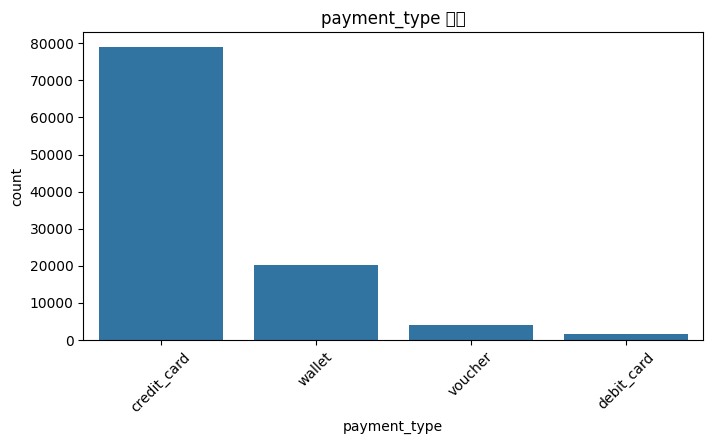

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 5103

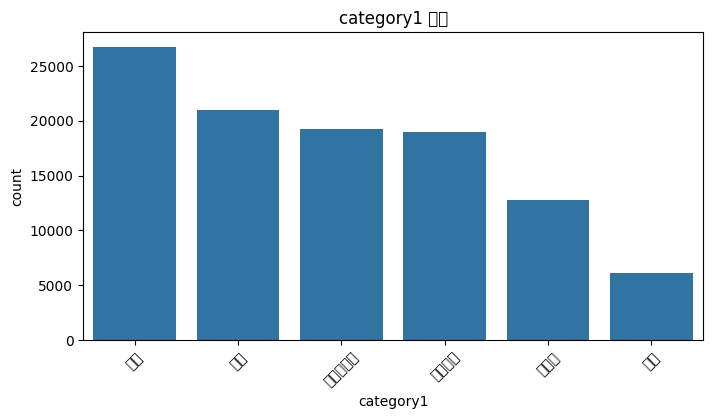

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49

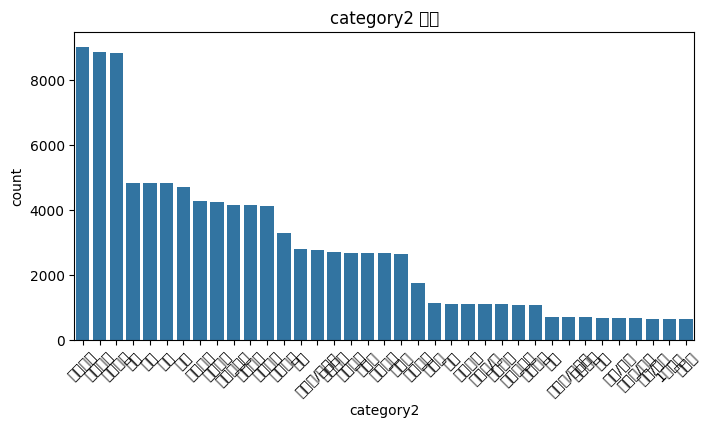

C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53456 (\N{HANGUL SYLLABLE TAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49353

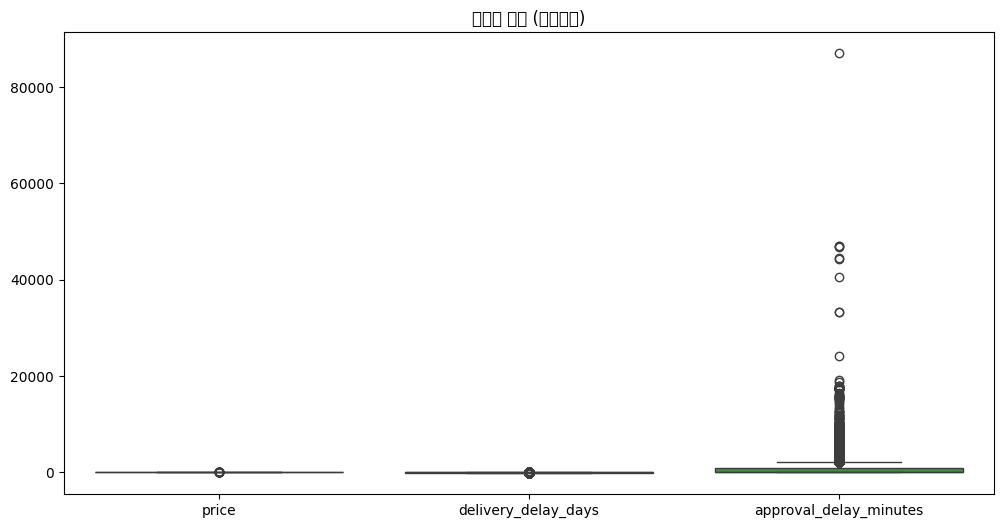

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 기본 통계량 확인 (수치형 변수만)
print("\n✅ 기본 통계량(수치형 변수):")
print(df.describe())

# ✅ 수치형 변수 리스트
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# ✅ 수치형 변수 분포 히스토그램
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("수치형 변수 분포 히스토그램")
plt.show()

# ✅ 주요 범주형 변수 분포 확인
categorical_cols = ['gender', 'country', 'payment_type', 'category1', 'category2']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} 분포")
    plt.show()

# ✅ 이상치 탐색 박스플롯 (price & delivery_delay_days)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['price', 'delivery_delay_days', 'approval_delay_minutes']])
plt.title("이상치 탐색 (박스플롯)")
plt.show()


In [16]:
# ✅ 결측치 제거 (2% 정도이므로 안전하게 drop)
df_clean = df.dropna(subset=['order_delivered_timestamp', 'delivery_delay_days'])

# 결측치 처리 결과 확인
print("✅ 결측치 제거 후 데이터 크기:", df_clean.shape)
print("\n✅ 남은 결측치 개수:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


✅ 결측치 제거 후 데이터 크기: (102623, 25)

✅ 남은 결측치 개수:
approval_delay_minutes    14
dtype: int64


C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\brian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

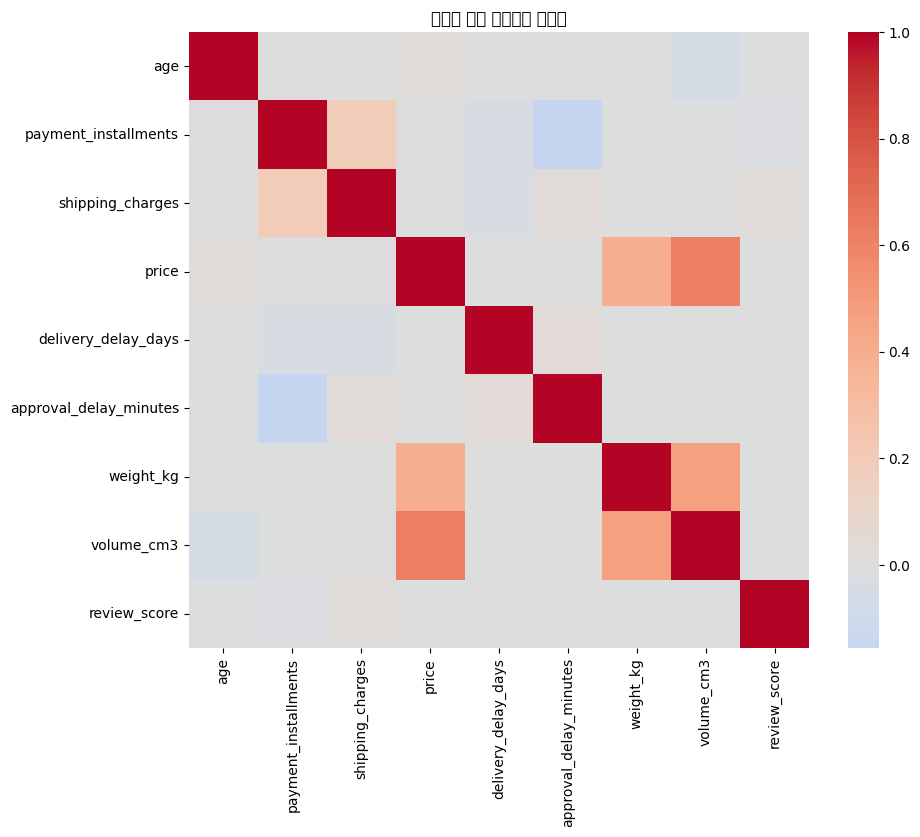


✅ 유의미한 상관관계 (+0.6 이상 또는 -0.6 이하):
                        age  payment_installments  shipping_charges     price  \
age                     1.0                   NaN               NaN       NaN   
payment_installments    NaN                   1.0               NaN       NaN   
shipping_charges        NaN                   NaN               1.0       NaN   
price                   NaN                   NaN               NaN  1.000000   
delivery_delay_days     NaN                   NaN               NaN       NaN   
approval_delay_minutes  NaN                   NaN               NaN       NaN   
weight_kg               NaN                   NaN               NaN       NaN   
volume_cm3              NaN                   NaN               NaN  0.625055   
review_score            NaN                   NaN               NaN       NaN   

                        delivery_delay_days  approval_delay_minutes  \
age                                     NaN                     NaN   
payment_inst

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 수치형 변수만 선택
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# ✅ 상관계수 행렬
corr_matrix = df_clean[numeric_cols].corr()

# ✅ 유의미한 상관관계만 필터 (+0.6 이상 / -0.6 이하)
significant_corr = corr_matrix[(corr_matrix >= 0.6) | (corr_matrix <= -0.6)]

# ✅ 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("수치형 변수 상관관계 히트맵")
plt.show()

print("\n✅ 유의미한 상관관계 (+0.6 이상 또는 -0.6 이하):")
print(significant_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))
